# Analyzing Star Wars survey results
This is a data analysis and visualization study to analyze a Star Wars survey based on data collected
and compiled by FiveThirtyEight. 

The dataset can be found [https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv]

In [72]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

In [73]:
print(star_wars.head(20))

    RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0            NaN                                           Response             
1   3.292880e+09                                                Yes             
2   3.292880e+09                                                 No             
3   3.292765e+09                                                Yes             
4   3.292763e+09                                                Yes             
5   3.292731e+09                                                Yes             
6   3.292719e+09                                                Yes             
7   3.292685e+09                                                Yes             
8   3.292664e+09                                                Yes             
9   3.292654e+09                                                Yes             
10  3.292640e+09                                                Yes             
11  3.292638e+09            

In [74]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Cleaning up Respondent ID columns

In [75]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.head(20)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

# Cleaning up Yes/No columns

In [76]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [77]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Converting the two Dataframe Series into Boolean for easy analysis

In [78]:
yes_no = {}
yes_no = {"Yes":True, "No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].head(10)


1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [79]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].head(10)

1      True
2       NaN
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [80]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning up the checkbox columns and renaming them

In [81]:
import numpy as np
seen_movie = {"Star Wars: Episode I  The Phantom Menace": True,
              np.nan: False,
              "Star Wars: Episode II  Attack of the Clones": True,
              "Star Wars: Episode III  Revenge of the Sith": True,
              "Star Wars: Episode IV  A New Hope": True,
              "Star Wars: Episode V The Empire Strikes Back": True,
              "Star Wars: Episode VI Return of the Jedi": True}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen_movie)

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning up the ranking columns and converting into float

In [82]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2","Unnamed: 11": "ranking_3","Unnamed: 12": "ranking_4","Unnamed: 13": "ranking_5",
"Unnamed: 14": "ranking_6"})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Finding the highest ranked movie

In [83]:
star_wars_mean = star_wars[star_wars.columns[9:15]].mean()
star_wars_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

# Plotting the ranking of movies

<Container object of 6 artists>

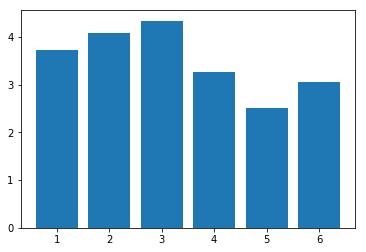

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(1,7),star_wars[star_wars.columns[9:15]].mean())


After cleaning up the columns and plotting the ranking for the movies, as we expected we observe that the original movies are rated higher than the newer ones

# Plotting the count of viewers

<Container object of 6 artists>

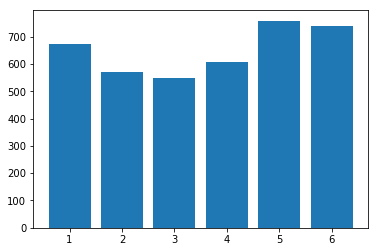

In [85]:
plt.bar(range(1,7),star_wars[star_wars.columns[3:9]].sum())

As we can observe, the viewer count was highest for 5 (Star Wars: Episode V The Empire Strikes Back) and
6 (Star Wars: Episode VI Return of the Jedi), which is in line with the above observations that these movies are
ranked higher than others

# Analyzing the survery data separately for Male and Female viewers

In [86]:
star_wars_male = star_wars[star_wars["Gender"] == "Male"]
star_wars_female = star_wars[star_wars["Gender"] == "Female"]

# Plotting the ranking of movies for males and females

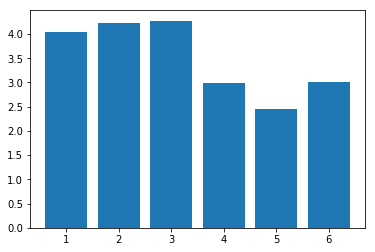

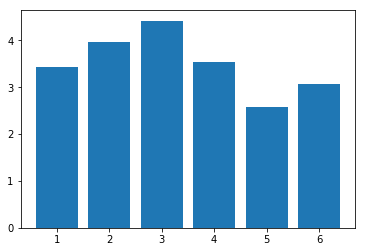

In [87]:
plt.bar(range(1,7),star_wars_male[star_wars_male.columns[9:15]].mean())
plt.show()
plt.bar(range(1,7),star_wars_female[star_wars_female.columns[9:15]].mean())
plt.show()

# Plotting the count of male and female viewers

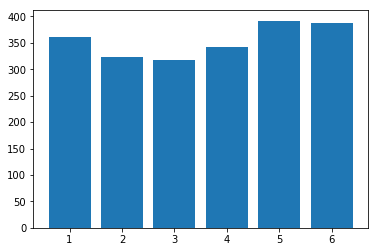

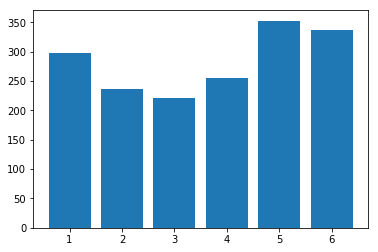

In [88]:
plt.bar(range(1,7),star_wars_male[star_wars_male.columns[3:9]].sum())
plt.show()
plt.bar(range(1,7),star_wars_female[star_wars_female.columns[3:9]].sum())
plt.show()

Observations - Interestingly more males than females watched episodes 1-3 but liked them far less than females

# Conclusion
- From the data we analyzed in this small project we can observe that Star Wars: Episode V The Empire Strikes Back
    is the most liked episode with highest rating and viewership. 